Una maquina de una linea de produccion se puede encontrar en alguno de los siguientes estados:

$$
S_1 = Trabajando
$$

$$
S_2 = Rota
$$

La empresa cuenta con un sistema de control que verifica el funcionamiento de la maquina cada 1 minuto.

Si en un control la maquina se encuentra en estado "Trabajando" la prababilidad que en el siguiente control este en estado "Rota" es $P_{12}$ = 0.05

Si la maquina se encuentra operativa la probabilidad que continue en el mismo estado en la siguiente verificacion es $P_{11}=0.95$ 

Si se verifica que la maquina esta en estado "Rota" la probabilidad que en la siguiente verificacion este en estado "Trabajando" es $P_{21}=0.4$

Y si la maquina se encuentra en estado "Rota" la proababilidad que continue en el mismo estado en la proxima verificacion es $P_{22}=0.6$

a) Determine la matriz de cambio de estado.<br>
b) Sabiendo que la maquina se encuentra trabajando, determinar la probabilidad que la maquina se encuentre operativa luego de 2 verificaciones.<br>
c) Determine la fraccion de tiempo que la maquina no se encuentra trabajando.<br>
d) Utilizando Matlab, Octave o Python simule 20 verificaciones realizadas por el sistema de control, mostrando en un grafico el estado en el que se encuentra la maquina en cada verificacion.

<hr>

a)

Matriz de cambio de estado:

$$
P = \begin{bmatrix}
P_{1/1} & P_{2/1} \\
P_{1/2} & P_{2/2} \\
\end{bmatrix}
$$

Nos dan todos los datos para completar la matriz.

$$
P = \begin{bmatrix}
P_{1/1} & P_{2/1} \\
P_{1/2} & P_{1/2} \\
\end{bmatrix}
$$

$$
P(1/1) = P_{11} = 0.95
$$

$$
P(2/1) = P_{12} = 0.05
$$

$$
P(1/2) = P_{21} = 0.4
$$

$$
P(2/2) = P_{22} = 0.6
$$

Entonces:

$$
P = \begin{bmatrix}
0.95 & 0.05 \\
0.4  & 0.6 \\
\end{bmatrix}
$$

b)

La maquina se encuentra en estado trabajando, esto es 1. Luego de dos verificaciones para que este rota pueden ocurrir los siguientes caminos:

$$
S_1 -> S_2 y S_2 -> S_2
$$

$$
S_1 -> S_1 y S_1 -> S_2
$$

Entonces:

$$
P_{{en dos pasos}_{12}} = P_{12} P_{22} + P_{11} P_{12}
$$

$$
0.05 * 0.6 + 0.95 * 0.05 = 0.0775
$$

Ahora hagamos lo mismo, pero usando la matriz de cambio de estados, usando la propiedad de que multiplicar la matriz por si misma n veces nos da las probabilidad en n pasos.

$$
P^2 = P * P
$$

$$
P^2 = \begin{bmatrix}
P_{1/1} & P_{2/1} \\
P_{1/2} & P_{2/2} \\
\end{bmatrix} *
\begin{bmatrix}
P_{1/1} & P_{2/1} \\
P_{1/2} & P_{2/2} \\
\end{bmatrix}
$$

$$
P^2 = \begin{bmatrix}
0.95 & 0.05 \\
0.4  & 0.6 \\
\end{bmatrix} *
\begin{bmatrix}
0.95 & 0.05 \\
0.4  & 0.6 \\
\end{bmatrix}
$$

Nos interesa el valor de P_{2/1} de la matriz $P^2$ asi que solo hago la multiplicacion de la primera fila por la segunda columna: $0.95 * 0.05 + 0.05 * 0.6$, notar que es la misma cuenta que nos dio antes, por lo tanto el resultados es 0.0775.

c)

#### Comportamiento asintotico

In [11]:
import numpy as np
P = np.matrix("0.95 0.05 ; 0.4 0.6")
P

matrix([[0.95, 0.05],
        [0.4 , 0.6 ]])

In [10]:
P * P

matrix([[0.9225, 0.0775],
        [0.62  , 0.38  ]])

In [15]:
P ** 10

matrix([[0.88917033, 0.11082967],
        [0.88663738, 0.11336262]])

In [16]:
P ** 20

matrix([[0.8888896 , 0.1111104 ],
        [0.88888319, 0.11111681]])

In [17]:
P ** 50

matrix([[0.88888889, 0.11111111],
        [0.88888889, 0.11111111]])

In [18]:
P ** 100

matrix([[0.88888889, 0.11111111],
        [0.88888889, 0.11111111]])

Se observa que las columnas tienen el mismo valor.

Que quiere decir esto? que no importa de que estado parto, si de 1 o de 2, luego de una gran cantidad de pasos el experimento tiene probabilidad de terminar de la misma forma. En este caso no importa si la maquina estaba rota o trabajando en el primer paso, luego de una gran cantidad de pasos la probabilidad de que la maquina este funcionando es 0.88888889 y que no lo este un 0.11111111

Notacion:

$$
\lim_{n \to \infty} P_{ij} = \pi_j
$$

Donde n es la cantidad de pasos.

Entonces, $\pi_j$ es la probabilidad de que el sistema se encuentre en el estado j sin importar del estado inicial

Entonces se cumple que:

$$
\sum_{j=0}^{M} \pi_j = 1
$$

Donde M es la cantidad de estados posibles.

#### Distribucion de estados asintoticos o distribucion asintotica (distribucion estacionaria):

$$
\vec{\pi}=(\pi_{0}, \pi_{1},..., \pi_{M})
$$

<b>Observacion</b>: podria no existir

Cumple que:

$$
\vec{\pi} P = \vec{\pi}
$$

Una distribucion es estacionaria si al aplicarle la matriz de transicion, O dicho de otra forma si hacemos un paso mas en la cadena de Markov, volvemos a obtener la misma distribucion de probabilidades.

c)

Nos piden el tiempo que la maquina no se encuentre trabando.

Planteamos entonces:

$$
\vec{\pi} P = \vec{\pi}
$$

Esto es:

$$
(\pi_1 \pi_2) P = (\pi_1 \pi_2)
$$

Lo que nos interesa es $\pi_2$

Esto nos va a dar una nocion de no importa en que estado se encuentra la maquina, que probabilidad hay de que se encuentre en estado 2, osea rota.

Esta probabilidad la podemos ver como la fraccion de tiempo buscada.

Resolvemos el sistema:

$$
(\pi_1 \pi_2) 
\begin{bmatrix}
0.95 & 0.05\\
0.4  & 0.6 \\
\end{bmatrix}
= (\pi_1 \pi_2)
$$

$$
\pi_10.95 + \pi_20.4 = \pi_1
$$

$$
\pi_10.05 + \pi_20.6 = \pi_2
$$

$$
\pi_1 + \pi_2 = 1
$$

Esto da:

$$
\pi_1 = \frac{8}{9}
$$

$$
\pi_2 = \frac{1}{9}
$$

Por lo tanto la respuesta es un 1/9, que es aprox 0.11 esto quiere decir que un 11% porciento del tiempo aproximadamente la maquina permanece rota.

<b>Observacion</b>: este metodo lo pudimos aplicar porque el sistema converge, esto es porque la matrix tiene autovalores menores o iguales a 1.

d)

In [82]:
import random
def simulation(n):
    TRABAJANDO = 1
    ROTA = 2
    PROB_TRABAJANDO_TO_TRABAJANDO = 0.95
    PROB_ROTA_TO_ROTA = 0.6
    
    state = TRABAJANDO
    states = [state]
    
    for i in range(n):
    
        state = states[i]
        
        if (state == TRABAJANDO):
            value = random.random()
            if value <= PROB_TRABAJANDO_TO_TRABAJANDO:
                states.append(TRABAJANDO)
            else:
                states.append(ROTA)

        elif (state == ROTA):
            value = random.random()
            if value <= PROB_ROTA_TO_ROTA:
                states.append(ROTA)
            else:
                states.append(TRABAJANDO)

        else:
            raise "invalid state"
    
    return states

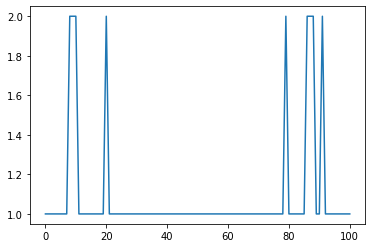

In [84]:
import matplotlib.pyplot as pyplot
states = simulation(100)
pyplot.plot(states)
pyplot.show()

In [85]:
states = simulation(1000000)
count_state_trabajando = 0
count_state_roto = 0
for state in states:
    if state == 1:
        count_state_trabajando += 1
    
    if state == 2:
        count_state_roto += 1

In [86]:
count_state_trabajando / len(states)

0.8896871103128897

In [87]:
count_state_roto / len(states)

0.11031288968711031

Vemos que nos dio 0.88 y 0.11 cuando el n es grande, estos son $\pi_1$ y $\pi_2$